
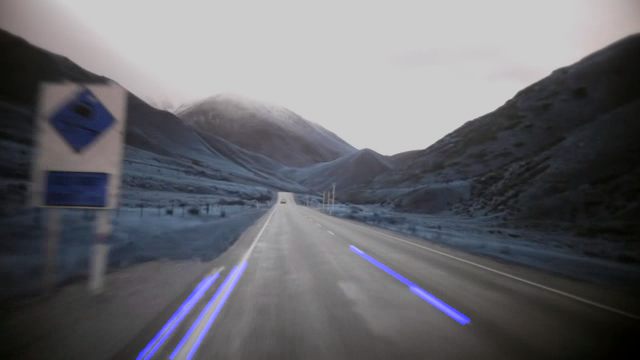

In [1]:
import cv2
from IPython.display import display, HTML, clear_output
import numpy as np
import base64
import time  # Import the time module

def region_of_interest(image, region_points):
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, region_points, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

def draw_the_lines(image, lines):
    lines_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(lines_image, (x1, y1), (x2, y2), (0, 0, 255), thickness=3)
    image_with_lines = cv2.addWeighted(image, 0.8, lines_image, 1, 0.0)
    return image_with_lines

def get_detected_lanes(image):
    (height, width) = (image.shape[0], image.shape[1])
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    canny_image = cv2.Canny(gray_image, 100, 120)
    region_of_interest_vertices = [(0, height), (width/2, height*0.65), (width, height)]
    cropped_image = region_of_interest(canny_image, np.array([region_of_interest_vertices], np.int32))
    lines = cv2.HoughLinesP(cropped_image, rho=2, theta=np.pi/180, threshold=50, lines=np.array([]),
                            minLineLength=40, maxLineGap=150)
    image_with_lines = draw_the_lines(image, lines)

    return image_with_lines

# Open video file
video = cv2.VideoCapture("paste_your_.mp4_file_here")


try:
    while True:
        is_grabbed, frame = video.read()

        # Check if video has ended
        if not is_grabbed:
            break

        # Process frame
        frame_with_lanes = get_detected_lanes(frame)

        # Encode image as base64
        _, buffer = cv2.imencode('.png', cv2.cvtColor(frame_with_lanes, cv2.COLOR_BGR2RGB))
        image_base64 = base64.b64encode(buffer).decode('utf-8')

        # Display frame using IPython.display
        display(HTML(f"<img src='data:image/png;base64,{image_base64}'>"))

        # Add a delay between frames (0.1 seconds in this example)
        time.sleep(0.1)

        # Clear the previous output for smoother video playback
        clear_output(wait=True)

except KeyboardInterrupt:
    # Stop video playback if interrupted by user
    pass

finally:
    # Release video capture
    video.release()
    cv2.destroyAllWindows()
